In [126]:
from PIL import Image, ImageDraw
from io import BytesIO
import json
import joblib
import os
import random

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, ConcatDataset

from sklearn.manifold import TSNE
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt_style = 'seaborn-talk'

random.seed(25)

In [127]:
lt_data = torch.load('/home/kaihua/projects/Generalized-Long-Tail.private/checkpoints_v/imagenet_lt_resnext_baseline/save_outputs_test_lt.pth')
bl_data = torch.load('/home/kaihua/projects/Generalized-Long-Tail.private/checkpoints_v/imagenet_lt_resnext_baseline/save_outputs_test_bl.pth')
gbl_data = torch.load('/home/kaihua/projects/Generalized-Long-Tail.private/checkpoints_v/imagenet_lt_resnext_baseline/save_outputs_test_bbl.pth')

In [128]:
def do_plot(X_fit, labels, title=None):
    dimension = X_fit.shape[1]
    label_types = sorted(list(set(labels)))
    num_labels = len(label_types)
    colors = cm.Accent(np.linspace(0, 1, num_labels))
    with plt.style.context(plt_style):
        fig = plt.figure()
        if dimension == 2:
            ax = fig.add_subplot(111)
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           c=col)
        elif dimension == 3:
            ax = fig.add_subplot(111, projection='3d')
            for lab, col in zip(label_types, colors):
                ax.scatter(X_fit[labels==lab, 0],
                           X_fit[labels==lab, 1],
                           X_fit[labels==lab, 2],
                           c=col)
        else:
            raise Exception('Unknown dimension: %d' % dimension)
        plt.title(title)
        plt.show()

In [129]:
lt_data.keys()

dict_keys(['save_features', 'save_preds', 'save_labs', 'save_frqs', 'save_atts', 'save_inds'])

In [130]:
def find_similar_cls(data, cls=0):
    max_cls = 0
    max_second = -1
    max_count = []
    if True:
    #for cls in range(100):
        count = []
        for i in range(1000):
            num_pred = (data['save_preds'][data['save_labs'] == i].max(-1)[1] == cls).sum().item()
            count.append((num_pred, i))
        count.sort(reverse=True)
        if count[1][0] > max_second:
            max_second = count[1][0]
            max_cls = cls
            max_count = count
    return max_count, max_cls

In [143]:
# 0 vs 440
feature1 = lt_data['save_features'][lt_data['save_labs'] == 0]
feature2 = lt_data['save_features'][lt_data['save_labs'] == 440]

label1 = lt_data['save_labs'][lt_data['save_labs'] == 0]
label2 = lt_data['save_labs'][lt_data['save_labs'] == 440]


label = torch.cat([label1, label2], dim=0).numpy()
feature = torch.cat([feature1, feature2], dim=0).view(label.size, -1).numpy()

In [146]:
tsne2 = TSNE(n_components=2, random_state=0)
tsne_feats = tsne2.fit_transform(feature)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


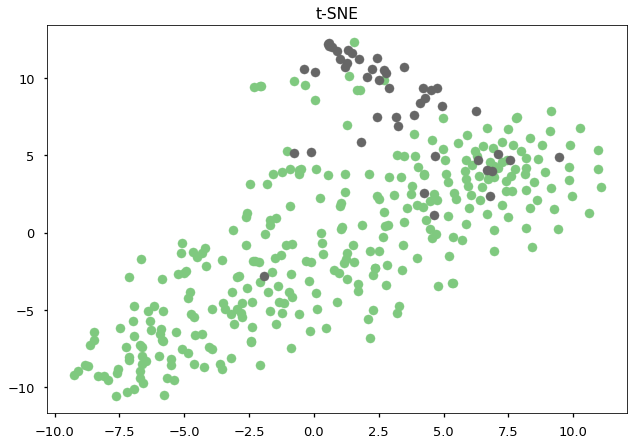

In [147]:
do_plot(tsne_feats, label, 't-SNE')

In [122]:
find_similar_cls(lt_data, cls=12)

([(164, 12),
  (8, 121),
  (6, 28),
  (5, 147),
  (4, 40),
  (4, 34),
  (3, 943),
  (3, 351),
  (3, 17),
  (3, 8),
  (2, 325),
  (2, 159),
  (2, 91),
  (2, 47),
  (1, 938),
  (1, 896),
  (1, 882),
  (1, 857),
  (1, 833),
  (1, 797),
  (1, 762),
  (1, 755),
  (1, 748),
  (1, 723),
  (1, 710),
  (1, 636),
  (1, 581),
  (1, 517),
  (1, 513),
  (1, 501),
  (1, 486),
  (1, 439),
  (1, 407),
  (1, 400),
  (1, 368),
  (1, 301),
  (1, 297),
  (1, 275),
  (1, 237),
  (1, 236),
  (1, 221),
  (1, 213),
  (1, 191),
  (1, 188),
  (1, 185),
  (1, 154),
  (1, 148),
  (1, 139),
  (1, 136),
  (1, 125),
  (1, 94),
  (1, 89),
  (1, 83),
  (1, 44),
  (1, 0),
  (0, 999),
  (0, 998),
  (0, 997),
  (0, 996),
  (0, 995),
  (0, 994),
  (0, 993),
  (0, 992),
  (0, 991),
  (0, 990),
  (0, 989),
  (0, 988),
  (0, 987),
  (0, 986),
  (0, 985),
  (0, 984),
  (0, 983),
  (0, 982),
  (0, 981),
  (0, 980),
  (0, 979),
  (0, 978),
  (0, 977),
  (0, 976),
  (0, 975),
  (0, 974),
  (0, 973),
  (0, 972),
  (0, 971),
  (0,

In [148]:
annotation = json.load(open('/home/kaihua/projects/Generalized-Long-Tail.private/_ImageNetGeneration/imagenet_sup_intra_lt_inter_lt.json'))

In [149]:
annotation.keys()

dict_keys(['cat2id', 'id2cat', 'train', 'val', 'test_lt', 'test_bl', 'test_bbl'])

In [154]:
def show_image_in_class(annotation, cls=0, num_img=50, offset=0):
    images = []
    for path, cid in annotation['train']['label'].items():
        if int(cid) == cls:
            images.append(path)
            
    for i in range(num_img):
        path = images[i + offset]
        print_image(path)
        
        
def print_image(img_path):
    img = Image.open(img_path)
    fig = plt.figure()
    plt.imshow(img)
    plt.axis('off')  # clear x- and y-axes

/home/kaihua/anaconda3/envs/adv/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


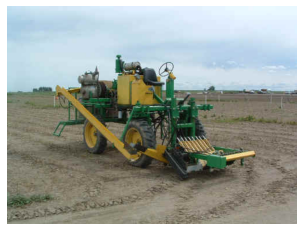

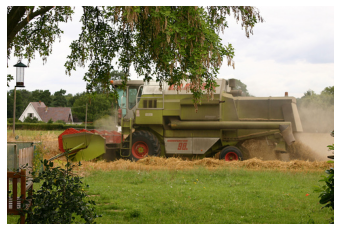

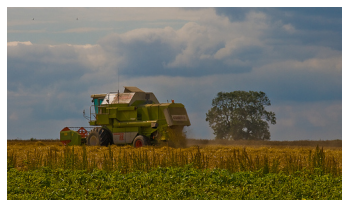

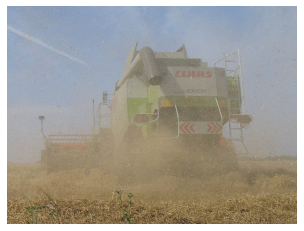

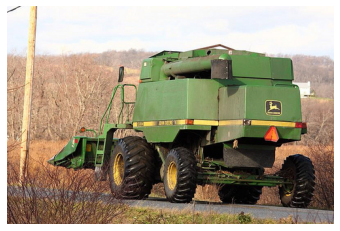

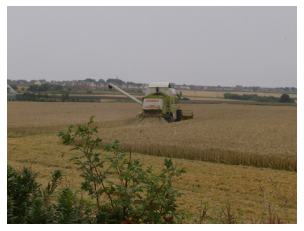

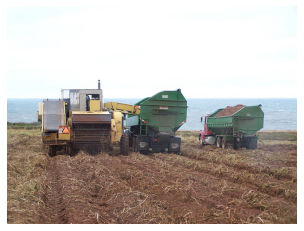

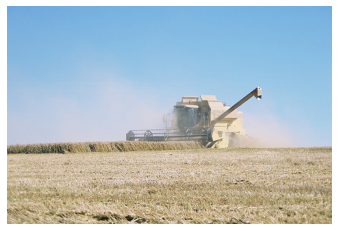

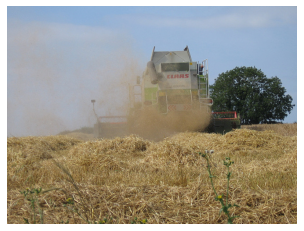

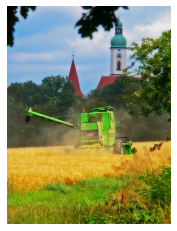

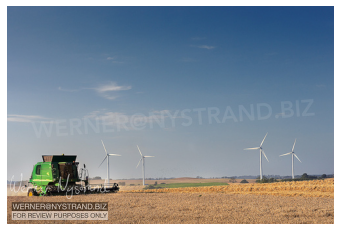

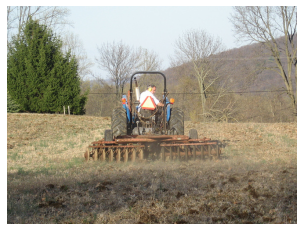

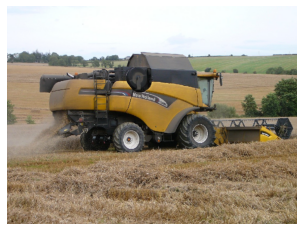

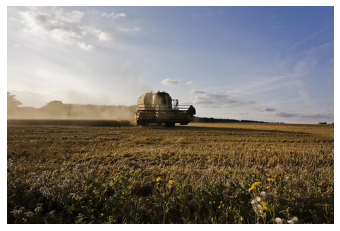

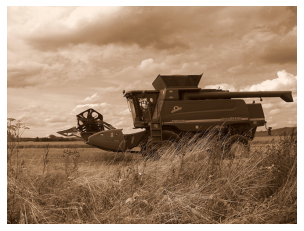

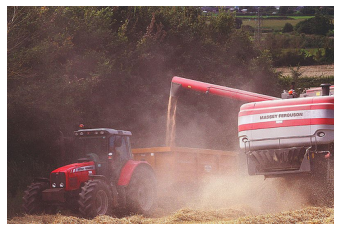

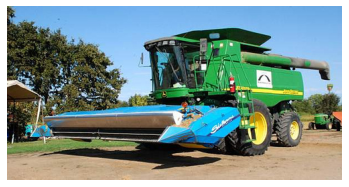

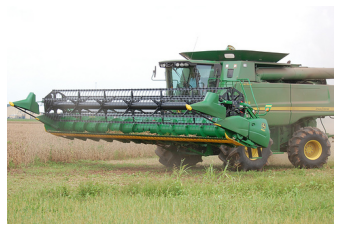

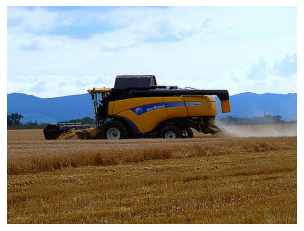

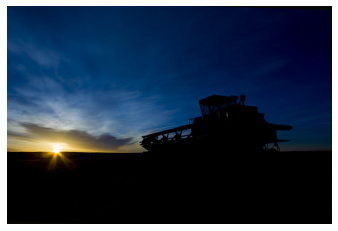

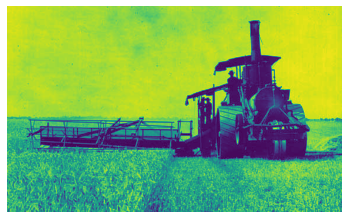

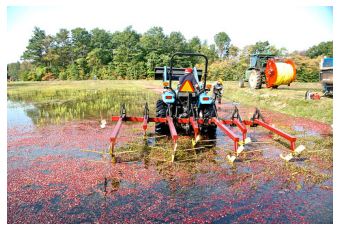

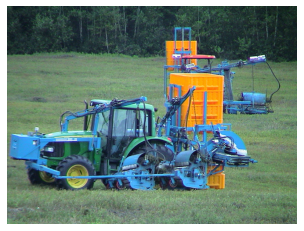

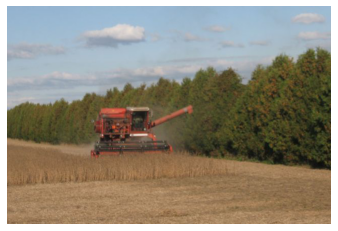

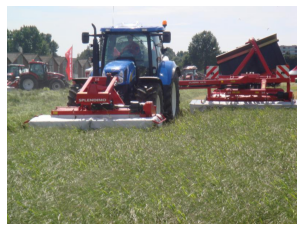

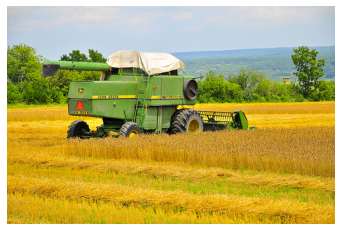

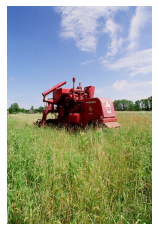

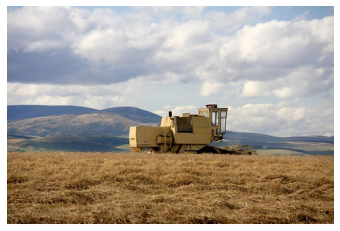

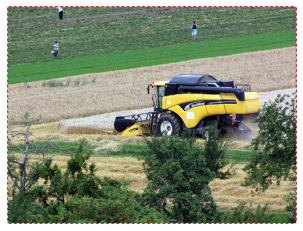

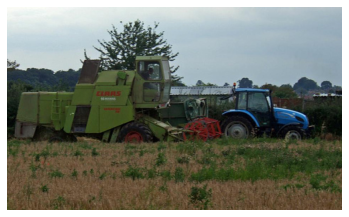

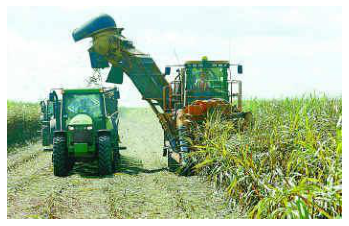

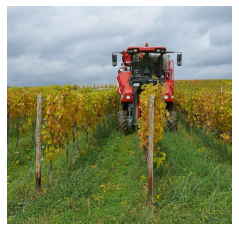

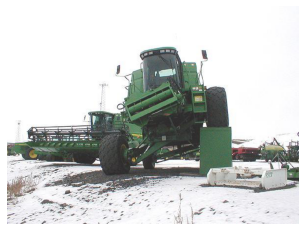

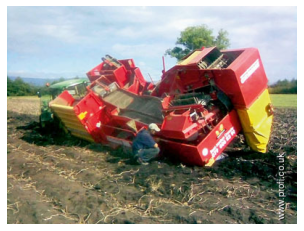

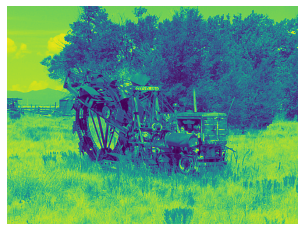

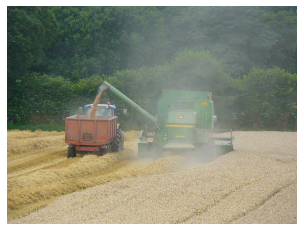

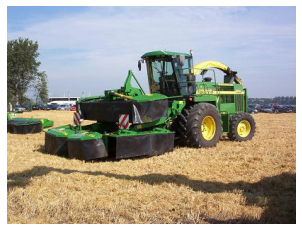

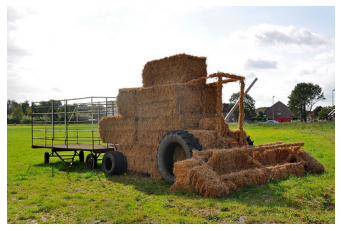

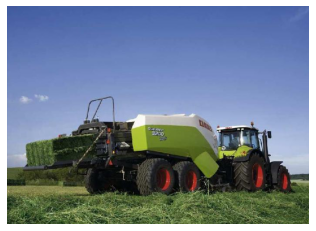

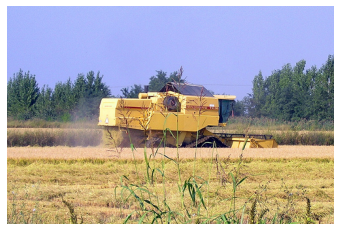

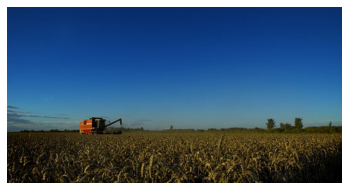

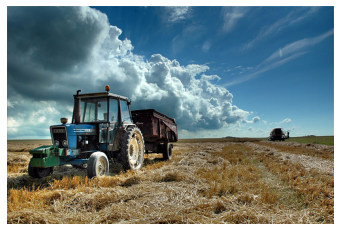

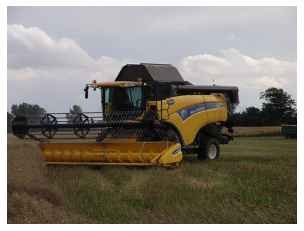

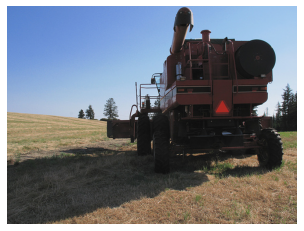

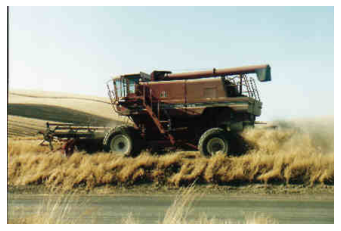

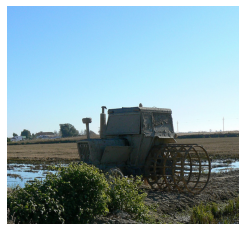

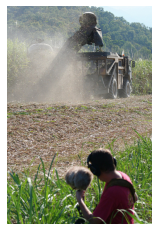

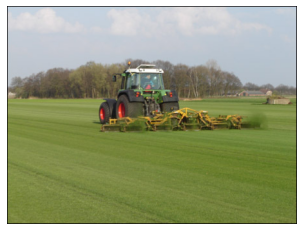

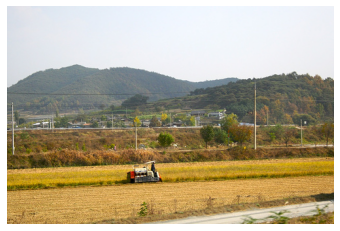

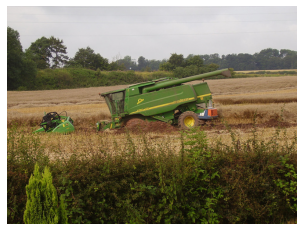

In [160]:
show_image_in_class(annotation, cls=440, num_img=50, offset=0)